#      ANN MODEL FOR PREDICTION OF BUBBLE POINT
#                          PRESSURE OF CRUDE OILS

In [ ]:
## ALL LIBRARIES USED HERE

In [1]:
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
# ---------------EXCEL DATA---------------

In [4]:
data = pd.read_excel('Simulation Data (1).xlsx')

In [7]:
data.head()

,GOR,Oil gravity,Gas gravity,T,Pb,Bob
0,1507,0.951,39.3,225,3573.0,1.875
1,898,0.802,32.7,175,3571.0,1.471
2,898,0.802,32.7,150,3426.0,1.451
3,1579,0.930,42.8,235,3405.0,1.997
4,825,0.779,34.2,185,3354.0,1.431


# Inpect Data
Have a quick look at the joint distribution of a few pairs of columns from the training set.

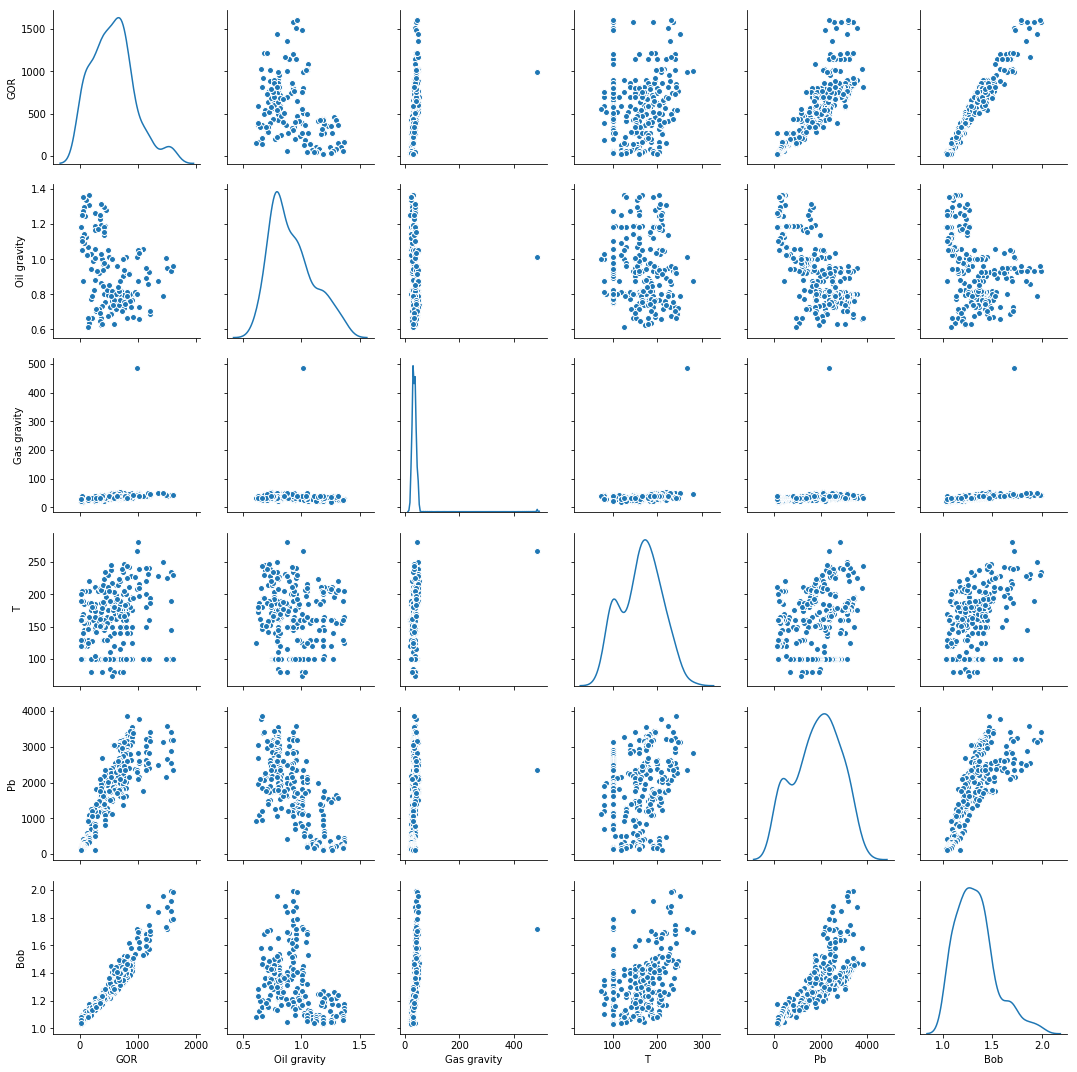

In [45]:
sns.pairplot(data[['GOR', 'Oil gravity', 'Gas gravity', 'T', 'Pb', 'Bob']], diag_kind="kde")
plt.show()

In [1]:
#----------------   SPLIT DATA FOR TRAIN AND TEST : Target is Pb ----------------

In [5]:
X_train, X_test, y_train, y_test =train_test_split(data[['GOR', 'Oil gravity', 'Gas gravity', 'T']], data.Pb)
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

/Users/enkhbat/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/enkhbat/miniconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/enkhbat/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [6]:
# reshape no matter how many col it became 1
y_train=y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)

In [7]:

#-------------- Building NN model ------------------



In [8]:
tf.reset_default_graph()

X=tf.placeholder(dtype=tf.float32, shape=(None,4), name='X' )
y=tf.placeholder(dtype=tf.float32, shape=(None,1), name='y' )

# setup hidden layer. data, neuron act func name
h1=tf.layers.dense(X,8, activation=tf.nn.relu, name='hidden1')

# output layer

output=tf.layers.dense(h1, 1, activation=None, name='output')

loss=tf.losses.mean_squared_error(y, output)
optimizer=tf.train.AdamOptimizer(.01)

training_run=optimizer.minimize(loss)

In [9]:
#---------- ITERATED 50 EPOCH ----------------

In [10]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    
    for epoch in range(50):
        sess.run(training_run, feed_dict={X: X_train, y: y_train})
        train_loss = sess.run(loss, feed_dict={X: X_train, y: y_train})
        test_loss = sess.run(loss, feed_dict={X: X_test, y: y_test})
        print('epoch', epoch, 'train loss', train_loss, 'test loss', test_loss)

epoch 0 train loss 4744020.5 test loss 3349648.5
epoch 1 train loss 4743694.0 test loss 3349416.5
epoch 2 train loss 4743369.0 test loss 3349184.5
epoch 3 train loss 4743045.5 test loss 3348953.5
epoch 4 train loss 4742723.0 test loss 3348724.0
epoch 5 train loss 4742402.5 test loss 3348495.8
epoch 6 train loss 4742082.5 test loss 3348266.8
epoch 7 train loss 4741761.5 test loss 3348037.0
epoch 8 train loss 4741440.5 test loss 3347807.5
epoch 9 train loss 4741118.5 test loss 3347576.5
epoch 10 train loss 4740794.0 test loss 3347345.0
epoch 11 train loss 4740469.5 test loss 3347111.2
epoch 12 train loss 4740142.5 test loss 3346877.8
epoch 13 train loss 4739814.0 test loss 3346643.2
epoch 14 train loss 4739483.0 test loss 3346406.5
epoch 15 train loss 4739148.5 test loss 3346169.0
epoch 16 train loss 4738811.0 test loss 3345929.8
epoch 17 train loss 4738469.5 test loss 3345687.0
epoch 18 train loss 4738126.0 test loss 3345441.5
epoch 19 train loss 4737777.0 test loss 3345192.0
epoch 20 t

In [11]:
#-----------5000 epoch iteration ---------------

In [44]:
init = tf.global_variables_initializer()

train_errs = []
test_errs = []
with tf.Session() as sess:
    init.run()
    
    for epoch in range(5000):
        # training is here
        sess.run(training_run, feed_dict={X: X_train, y: y_train})
        
        # Calculate train loss
        train_loss = sess.run(loss, feed_dict={X: X_train, y: y_train})
        train_errs.append(train_loss)
        
        # Calculate test loss
        test_loss = sess.run(loss, feed_dict={X: X_test, y: y_test})
        test_errs.append(test_loss)
        
        # Print losses
        if epoch %10==0:
            print('epoch', epoch, 'train loss', train_loss, 'test loss', test_loss)
    pred = sess.run(output, feed_dict={X: X_test})

In [13]:
# ------------------- R square -------------------------

In [14]:
# Evaluate r^2
metrics.r2_score(y_test, pred)

0.8092541308890371

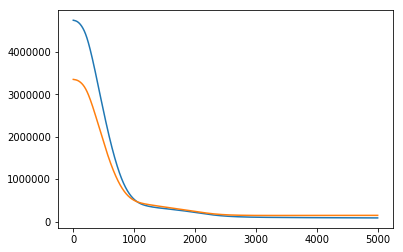

In [15]:
# Plot the learning curves
plt.plot(train_errs, label='Train loss')
plt.plot(test_errs, label="Test loss")

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:


#---------------        Mean Squared Error     ------------------



In [18]:
mean_squared_error(y_test, pred)

146353.39820770785

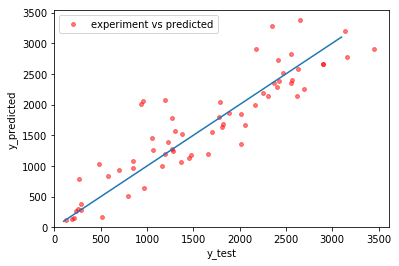

In [21]:
plt.scatter(y_test, pred, s=15, alpha=0.5, label="experiment vs predicted", color="red")
plt.xlabel("y_test")
plt.ylabel("y_predicted")
plt.legend(loc='upper left')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([100, 3100], [100, 3100])
plt.show()

In [22]:
type(y_test)

numpy.ndarray

In [23]:
len(pred)

64

In [24]:
df=pd.DataFrame({'y_test':[y_test[i][0] for i in range(len(y_test))],
                 'pred':[pred[i][0] for i in range(len(pred))]}, 
                index=[x for x in range(len(pred))])

In [25]:
df.describe()

,y_test,pred
count,64.000000,64.000000
mean,1607.000000,1646.451057
std,882.863469,866.073001
min,130.000000,122.176033
25%,947.750000,1049.742767
50%,1567.500000,1648.642151
75%,2376.250000,2305.937866
max,3449.000000,3379.154053


In [26]:
#----------------   SPLIT DATA FOR TRAIN AND TEST : Target is Pb ----------------

In [27]:
X_train, X_test, y_train, y_test =train_test_split(data[['GOR', 'Oil gravity', 'Gas gravity', 'T']], data.Bob)
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

/Users/enkhbat/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/enkhbat/miniconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/enkhbat/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [28]:
# reshape no matter how many col it became 1
y_train=y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)

In [29]:

#-------------- Building NN model for "Bob"  ------------------



In [30]:
tf.reset_default_graph()

X=tf.placeholder(dtype=tf.float32, shape=(None,4), name='X' )
y=tf.placeholder(dtype=tf.float32, shape=(None,1), name='y' )

# setup hidden layer. data, neuron act func name
h1=tf.layers.dense(X,8, activation=tf.nn.relu, name='hidden1')

# output layer

output=tf.layers.dense(h1, 1, activation=None, name='output')

loss=tf.losses.mean_squared_error(y, output)
optimizer=tf.train.AdamOptimizer(.01)

training_run=optimizer.minimize(loss)

In [31]:
#---------- ITERATED 50 EPOCH ----------------

In [32]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    
    for epoch in range(50):
        sess.run(training_run, feed_dict={X: X_train, y: y_train})
        train_loss = sess.run(loss, feed_dict={X: X_train, y: y_train})
        test_loss = sess.run(loss, feed_dict={X: X_test, y: y_test})
        print('epoch', epoch, 'train loss', train_loss, 'test loss', test_loss)

epoch 0 train loss 1.3838013 test loss 1.1950183
epoch 1 train loss 1.266436 test loss 1.0949297
epoch 2 train loss 1.1570208 test loss 1.0022657
epoch 3 train loss 1.0559303 test loss 0.9164139
epoch 4 train loss 0.9636693 test loss 0.83816373
epoch 5 train loss 0.8793467 test loss 0.76706326
epoch 6 train loss 0.80315906 test loss 0.7019204
epoch 7 train loss 0.7336484 test loss 0.6424577
epoch 8 train loss 0.67025125 test loss 0.5879344
epoch 9 train loss 0.6119514 test loss 0.5387988
epoch 10 train loss 0.55762887 test loss 0.4944045
epoch 11 train loss 0.50732195 test loss 0.45310882
epoch 12 train loss 0.4607651 test loss 0.4156122
epoch 13 train loss 0.4174266 test loss 0.38085276
epoch 14 train loss 0.37726364 test loss 0.34918484
epoch 15 train loss 0.34004003 test loss 0.3199846
epoch 16 train loss 0.30558586 test loss 0.29302126
epoch 17 train loss 0.27373987 test loss 0.2676971
epoch 18 train loss 0.24460381 test loss 0.24474242
epoch 19 train loss 0.21829379 test loss 0.22

In [33]:
init = tf.global_variables_initializer()

train_errs = []
test_errs = []
with tf.Session() as sess:
    init.run()
    
    for epoch in range(200):
        # training is here
        sess.run(training_run, feed_dict={X: X_train, y: y_train})
        
        # Calculate train loss
        train_loss = sess.run(loss, feed_dict={X: X_train, y: y_train})
        train_errs.append(train_loss)
        
        # Calculate test loss
        test_loss = sess.run(loss, feed_dict={X: X_test, y: y_test})
        test_errs.append(test_loss)
        
        # Print losses
        if epoch %10==0:
            print('epoch', epoch, 'train loss', train_loss, 'test loss', test_loss)
    pred = sess.run(output, feed_dict={X: X_test})

epoch 0 train loss 2.5198877 test loss 2.7168548
epoch 10 train loss 0.6888163 test loss 0.8710682
epoch 20 train loss 0.16752553 test loss 0.23647504
epoch 30 train loss 0.12541309 test loss 0.13607775
epoch 40 train loss 0.07443155 test loss 0.0939879
epoch 50 train loss 0.055670165 test loss 0.07901169
epoch 60 train loss 0.043052107 test loss 0.06090805
epoch 70 train loss 0.03506911 test loss 0.04629752
epoch 80 train loss 0.02863838 test loss 0.037959397
epoch 90 train loss 0.022983216 test loss 0.032899108
epoch 100 train loss 0.018670894 test loss 0.028099585
epoch 110 train loss 0.015048274 test loss 0.023327809
epoch 120 train loss 0.012209555 test loss 0.019437417
epoch 130 train loss 0.0099630235 test loss 0.016355589
epoch 140 train loss 0.008217794 test loss 0.0137767885
epoch 150 train loss 0.006901889 test loss 0.011634432
epoch 160 train loss 0.0058881207 test loss 0.009928616
epoch 170 train loss 0.005113804 test loss 0.008594991
epoch 180 train loss 0.0045244964 test

In [34]:
# Evaluate r^2
metrics.r2_score(y_test, pred)

0.8665988417625228

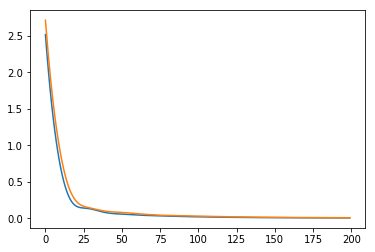

In [35]:
# Plot the learning curves
plt.plot(train_errs, label='Train loss')
plt.plot(test_errs, label="Test loss")

In [36]:
mean_squared_error(y_test, pred)

0.0061204543894298235

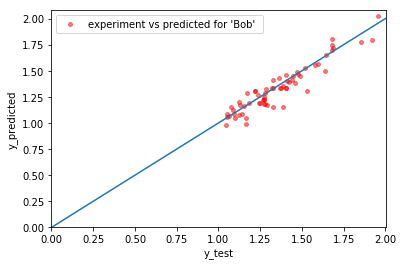

In [41]:
plt.scatter(y_test, pred, s=15, alpha=0.5, label="experiment vs predicted for 'Bob' ", color="red")
plt.xlabel("y_test")
plt.ylabel("y_predicted")
plt.legend(loc='upper left')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([0, 2], [0, 2])
plt.show()

In [42]:
df=pd.DataFrame({'y_test':[y_test[i][0] for i in range(len(y_test))],
                 'pred':[pred[i][0] for i in range(len(pred))]}, 
                index=[x for x in range(len(pred))])

In [43]:
df.describe()

,y_test,pred
count,64.000000,64.000000
mean,1.352656,1.332564
std,0.215890,0.223390
min,1.047000,0.982968
25%,1.180250,1.173045
50%,1.323000,1.308464
75%,1.461250,1.450540
max,1.954000,2.021178
